<a href="https://colab.research.google.com/github/sonhai1209/Tensorflow-workshop/blob/master/Tensorflow%20WS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bài thực hành sau Tensorflow WS. Bài tương tự với Project đã thực hiện ở workshop.

**1.Thêm các thu viện cần thiết**

In [0]:
# !pip3 install tensorflow-gpu==2.0.0-rc0
# !pip install wget

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [0]:
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [0]:
import pickle
import os

In [0]:
from sklearn.preprocessing import LabelBinarizer

In [0]:
import wget
 

In [0]:
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

**2.Tải dữ liệu**

In [0]:
def bar_custom(current, total, width=80):
    print("Downloading: %d%% [%d / %d] bytes" % (current / total * 100, current, total))

In [20]:
wget.download(link, bar=bar_custom)

Streaming output truncated to the last 5000 lines.
Downloading: 66% [82583552 / 123524425] bytes
Downloading: 66% [82591744 / 123524425] bytes
Downloading: 66% [82599936 / 123524425] bytes
Downloading: 66% [82608128 / 123524425] bytes
Downloading: 66% [82616320 / 123524425] bytes
Downloading: 66% [82624512 / 123524425] bytes
Downloading: 66% [82632704 / 123524425] bytes
Downloading: 66% [82640896 / 123524425] bytes
Downloading: 66% [82649088 / 123524425] bytes
Downloading: 66% [82657280 / 123524425] bytes
Downloading: 66% [82665472 / 123524425] bytes
Downloading: 66% [82673664 / 123524425] bytes
Downloading: 66% [82681856 / 123524425] bytes
Downloading: 66% [82690048 / 123524425] bytes
Downloading: 66% [82698240 / 123524425] bytes
Downloading: 66% [82706432 / 123524425] bytes
Downloading: 66% [82714624 / 123524425] bytes
Downloading: 66% [82722816 / 123524425] bytes
Downloading: 66% [82731008 / 123524425] bytes
Downloading: 66% [82739200 / 123524425] bytes
Downloading: 66% [82747392 / 

'traffic-signs-data.zip'

In [0]:
data_folder_link = './signsdata'  #Link folder lưu dữ liệu

In [22]:
if not os.path.isdir(data_folder_link):
    print('new directry has been created')           #Tạo thư mục lưu data
    os.system('mkdir {}'.format(data_folder_link))

new directry has been created


In [0]:
!unzip -q traffic-signs-data.zip -d $data_folder_link #unzip thư mục data

In [0]:
train_data_path = data_folder_link + "/train.p"
test_data_path = data_folder_link + "/test.p"
valid_data_path = data_folder_link + "/valid.p"


Sử dụng thư viện Pickle để đọc data

In [0]:
with open(train_data_path, mode="rb") as f:
    train = pickle.load(f)

In [0]:
with open(test_data_path, mode="rb") as f:
    test = pickle.load(f)

In [0]:
with open(valid_data_path, mode="rb") as f:
    valid = pickle.load(f)

Data được lưu dưới dạng {"features":[], "labels": []}

Bộ train được sử dụng cho quá trình huấn luyện

In [0]:
train_X = train["features"]
train_Y = train["labels"]


# Tráo bộ dữ liệu
train_X, train_Y = shuffle(train_X, train_Y)

Tại sao phải tráo bộ dữ liệu hiện tại, bởi vì các ảnh tương đồng nhau đang được liền nhau, cho nên để tăng tính ngẫu nhiên của dữ liệu ta phải tráo chúng lên.

Bộ valid được sử dụng cho quá trình kiểm soát độ chính xác của mô hình khi training

In [0]:
valid_X = valid["features"]
valid_Y = valid["labels"]

# Tráo bộ dữ liệu

valid_X, valid_Y = shuffle(valid_X, valid_Y)

Bộ test được sử dụng để kiểm tra độ chính xác của mô hình sau khi training

In [0]:
test_X = test["features"]
test_Y = test["labels"]

In [0]:
from sklearn.utils import shuffle

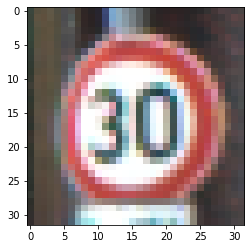

In [32]:
plt.imshow(test_X[1]) #Show 1 ảnh tự bộ test

In [0]:
classNames = ['Speed limit (20km/h)',     #Danh sách các nhãn
 'Speed limit (30km/h)',
 'Speed limit (50km/h)',
 'Speed limit (60km/h)',
 'Speed limit (70km/h)',
 'Speed limit (80km/h)',
 'End of speed limit (80km/h)',
 'Speed limit (100km/h)',
 'Speed limit (120km/h)',
 'No passing',
 'No passing for vehicles over 3.5 metric tons',
 'Right-of-way at the next intersection',
 'Priority road',
 'Yield',
 'Stop',
 'No vehicles',
 'Vehicles over 3.5 metric tons prohibited',
 'No entry',
 'General caution',
 'Dangerous curve to the left',
 'Dangerous curve to the right',
 'Double curve',
 'Bumpy road',
 'Slippery road',
 'Road narrows on the right',
 'Road work',
 'Traffic signals',
 'Pedestrians',
 'Children crossing',
 'Bicycles crossing',
 'Beware of ice/snow',
 'Wild animals crossing',
 'End of all speed and passing limits',
 'Turn right ahead',
 'Turn left ahead',
 'Ahead only',
 'Go straight or right',
 'Go straight or left',
 'Keep right',
 'Keep left',
 'Roundabout mandatory',
 'End of no passing',
 'End of no passing by vehicles over 3.5 metric tons']

Ví dụ ảnh có nhãn là 1 thì tên của nhãn sẽ classNames[1]. là Cho nên nhãn của ảnh bên trên sẽ là:

In [34]:
classNames[test_Y[1]]

'Speed limit (30km/h)'

Vậy nhãn của chúng ta đã tương ứng với ảnh, đây là biển số không vượt quá tốc độc 30km/h

Hiển thị 25 ảnh ban đầu sau khi xáo trộn dữ liệu

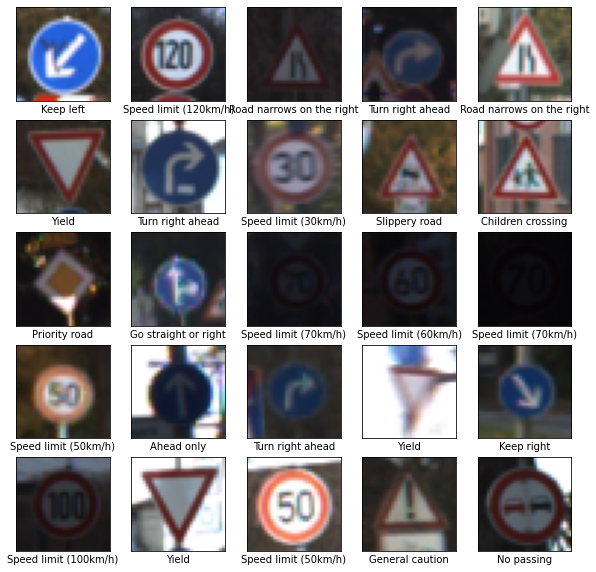

In [35]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(classNames[train_Y[i]])
plt.show()

**3.Chuẩn hóa dữ liệu**

In [0]:
train_X = train_X.astype("float") / 255.0  #Đưa dữ liệu về khoảng (0,1)
test_X = test_X.astype("float") / 255.0
valid_X = valid_X.astype("float") / 255.0

In [0]:
lb = LabelBinarizer()
train_Y = train_Y.reshape((train_Y.shape[0], 1))

Nhãn được đánh từ 0 đến 42 tương đương với danh sách như bên trên.

Chuyển về dạng one hot.

One hot chỉ là cách chuyển nhãn về sao cho đảm bảo tính tương đồng của các nhãn với nhau

In [0]:
train_Y = lb.fit_transform(train_Y)
valid_Y = lb.fit_transform(valid_Y)
test_Y = lb.fit_transform(test_Y)

In [39]:
train_Y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**Thiết kế model**(Đoạn này làm giống bài trước)

Chúng ta thực hiện các phép tích chập, phép max-pooling và sau đó đưa vào mạng nửa kết nối đầy đủ (half fully-connected network) và giảm chiều lớp xuống đúng bằng số lượng class.

In [0]:
model = Sequential()

In [0]:
learning_rate = 1e-2
batch_size = 64
num_epochs = 30 # Accuracy: 74% within 30 epochs

In [0]:
width = 32
height = 32
classes = 43

In [0]:
shape = (width,height, 3)

In [44]:
model.add(Conv2D(32, (3 , 3), padding='same', input_shape=shape))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(32, (3 , 3), padding='same'))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.add(Conv2D(64, (3 , 3), padding='same'))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3 , 3), padding='same'))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

Đưa vào mạng Neuron không kết nối đầy đủ vì có sử dụng Dropout.

In [0]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(classes))

In [0]:
model.add(Activation("softmax"))

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

**5. Tăng cường data khi train**

Ta có thể xoay, zoom to, thay đổi kích cỡ để có nhiều đặc trưng hơn mà vẫn giữ nguyên nhãn

In [0]:
aug = ImageDataGenerator(rotation_range=18, zoom_range=0.15, width_shift_range=0.2
                         , height_shift_range=0.2, shear_range=0.15, horizontal_flip=True, fill_mode="nearest")

Chỉ số decay nhằm điều chỉnh learning rate.

In [0]:
opt = SGD(lr=learning_rate, momentum=0.9, decay=learning_rate / num_epochs)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [51]:
print("Start Training...")
H = model.fit_generator(aug.flow(train_X, train_Y, batch_size=batch_size), validation_data=(valid_X, valid_Y), 
                        steps_per_epoch=train_X.shape[0] // batch_size, epochs=num_epochs, verbose=1)

Start Training...
Epoch 1/30
543/543 [==============================] - 26s 49ms/step - loss: 3.0055 - acc: 0.2299 - val_loss: 2.3077 - val_acc: 0.3433
Epoch 2/30
543/543 [==============================] - 19s 36ms/step - loss: 1.5989 - acc: 0.4993 - val_loss: 1.4571 - val_acc: 0.5365
Epoch 3/30
543/543 [==============================] - 19s 36ms/step - loss: 1.0003 - acc: 0.6665 - val_loss: 1.1123 - val_acc: 0.6569
Epoch 4/30
543/543 [==============================] - 19s 36ms/step - loss: 0.6559 - acc: 0.7798 - val_loss: 0.7860 - val_acc: 0.7567
Epoch 5/30
543/543 [==============================] - 19s 36ms/step - loss: 0.4569 - acc: 0.8451 - val_loss: 0.7606 - val_acc: 0.7837
Epoch 6/30
543/543 [==============================] - 20s 36ms/step - loss: 0.3355 - acc: 0.8867 - val_loss: 0.6247 - val_acc: 0.8265
Epoch 7/30
543/543 [==============================] - 19s 36ms/step - loss: 0.2840 - acc: 0.9034 - val_loss: 0.6201 - val_acc: 0.8356
Epoch 8/30
543/543 [========================

**6. Lưu model và load lại nhằm inference**

Lưu lại model sau khi train xong.


In [0]:
import tensorflow as tf
import numpy as np

In [60]:
model = tf.keras.models.load_model()

TypeError: ignored

In [0]:
result = model.predict(np.array(test_X[0:1]/255.0))

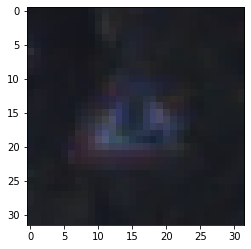

In [57]:
plt.imshow(test_X[50], cmap=plt.cm.binary)

In [0]:
predicted_label = np.argmax(result)

In [59]:
classNames[predicted_label]

'Dangerous curve to the left'